<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/adamczyk/klasyfikator_binarny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns

In [199]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [200]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [201]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [202]:
X = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns = ['target'])

In [203]:
y.shape

(569, 1)

In [204]:
y.value_counts()

target
1         357
0         212
Name: count, dtype: int64

In [205]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

<Axes: xlabel='mean area', ylabel='Count'>

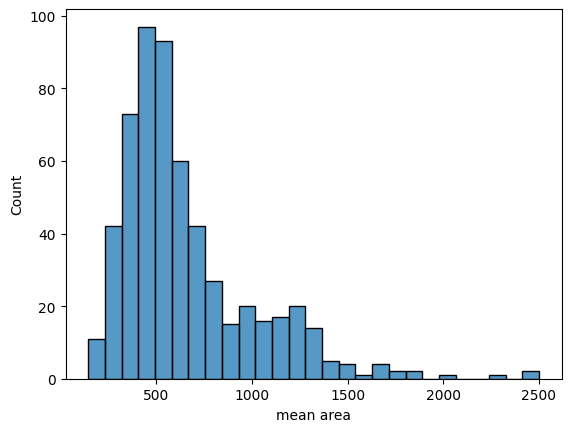

In [206]:
sns.histplot(data=X, x="mean area")

<Axes: xlabel='mean area', ylabel='target'>

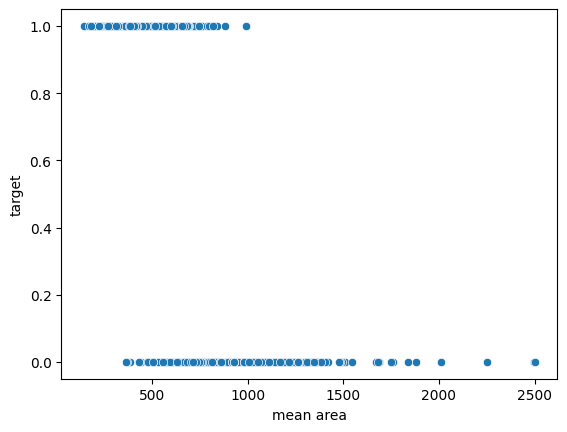

In [207]:
sns.scatterplot(data=X, x="mean area", y=y['target'])

In [208]:
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(6, 4))
for column in X.columns:
  sns.histplot(data=X, x=column)
  plt.show()"""

'\nplt.figure(figsize=(6, 4)) \nfor column in X.columns:\n  sns.histplot(data=X, x=column)\n  plt.show()'

In [209]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [210]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [211]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.3, random_state=42)

In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred_clf = clf.predict(X_test)
y_pred_clf_proba = clf.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [214]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_curve,classification_report

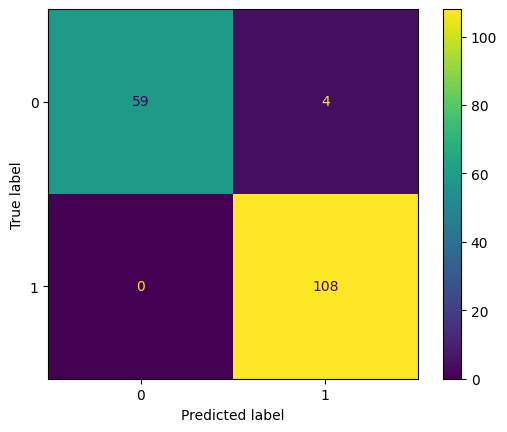

In [215]:
cm = confusion_matrix(y_test, y_pred_clf)
cm_display = ConfusionMatrixDisplay(cm).plot()

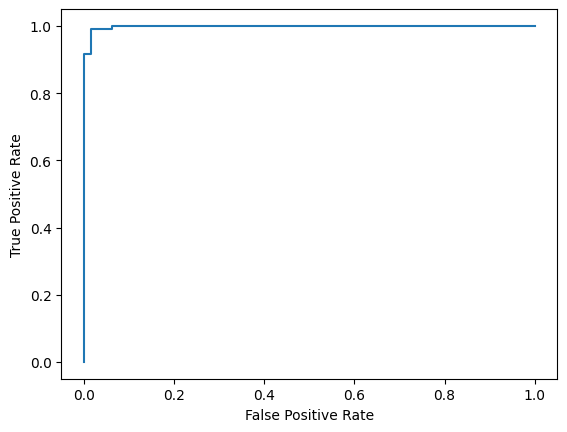

In [216]:
y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [217]:
print(classification_report(y_test, y_pred_clf, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.94      0.97        63
      benign       0.96      1.00      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [218]:
threshold  = 0
while threshold  < 0.9:
  y_pred_class = [1 if prob > threshold else 0 for prob in y_pred_clf_proba[:,1]]
  print("threshold: ", threshold, "\n", confusion_matrix(y_test, y_pred_class))
  threshold += 0.05

threshold:  0 
 [[  0  63]
 [  0 108]]
threshold:  0.05 
 [[ 34  29]
 [  0 108]]
threshold:  0.1 
 [[ 41  22]
 [  0 108]]
threshold:  0.15000000000000002 
 [[ 44  19]
 [  0 108]]
threshold:  0.2 
 [[ 50  13]
 [  0 108]]
threshold:  0.25 
 [[ 52  11]
 [  0 108]]
threshold:  0.3 
 [[ 54   9]
 [  0 108]]
threshold:  0.35 
 [[ 56   7]
 [  0 108]]
threshold:  0.39999999999999997 
 [[ 56   7]
 [  0 108]]
threshold:  0.44999999999999996 
 [[ 57   6]
 [  0 108]]
threshold:  0.49999999999999994 
 [[ 59   4]
 [  0 108]]
threshold:  0.5499999999999999 
 [[ 61   2]
 [  1 107]]
threshold:  0.6 
 [[ 62   1]
 [  1 107]]
threshold:  0.65 
 [[ 62   1]
 [  5 103]]
threshold:  0.7000000000000001 
 [[62  1]
 [ 9 99]]
threshold:  0.7500000000000001 
 [[63  0]
 [ 9 99]]
threshold:  0.8000000000000002 
 [[63  0]
 [11 97]]
threshold:  0.8500000000000002 
 [[63  0]
 [16 92]]


In [219]:
y_pred_clf[0:4]

array([1, 0, 0, 1])

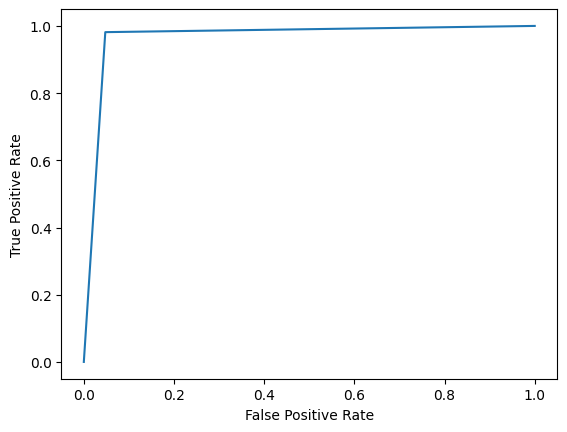

In [220]:
y_score = neigh3.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

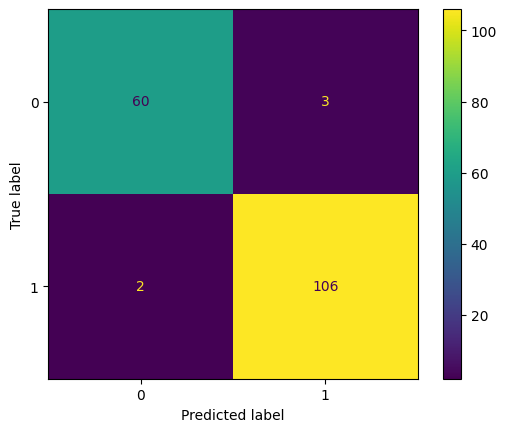

In [221]:
cm = confusion_matrix(y_test, y_pred_neigh3)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [222]:
threshold  = 0.5
while threshold  < 1:
  y_pred_class = [1 if prob > threshold else 0 for prob in y_pred_clf_proba[:,1]]
  print("threshold: ", threshold, "\n", confusion_matrix(y_test, y_pred_neigh3))
  threshold += 0.05

threshold:  0.5 
 [[ 60   3]
 [  2 106]]
threshold:  0.55 
 [[ 60   3]
 [  2 106]]
threshold:  0.6000000000000001 
 [[ 60   3]
 [  2 106]]
threshold:  0.6500000000000001 
 [[ 60   3]
 [  2 106]]
threshold:  0.7000000000000002 
 [[ 60   3]
 [  2 106]]
threshold:  0.7500000000000002 
 [[ 60   3]
 [  2 106]]
threshold:  0.8000000000000003 
 [[ 60   3]
 [  2 106]]
threshold:  0.8500000000000003 
 [[ 60   3]
 [  2 106]]
threshold:  0.9000000000000004 
 [[ 60   3]
 [  2 106]]
threshold:  0.9500000000000004 
 [[ 60   3]
 [  2 106]]


In [223]:
print(classification_report(y_test, y_pred_clf, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.94      0.97        63
      benign       0.96      1.00      0.98       108

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [224]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 8)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Najlepszy parametr:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Najlepszy parametr: {'n_neighbors': 5}


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 